# NCS1 Chemical Space t-SNE Analysis


In [1]:
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({'font.size': 8, 'font.family': 'sans-serif', 'font.sans-serif': 'Helvetica', 'xtick.labelsize':8, 'ytick.labelsize': 8})
sns.set_palette('colorblind')

morgan_generator = GetMorganGenerator(radius=2, fpSize=2048)

def fp_as_array(mol):
    fp = morgan_generator.GetFingerprint(mol)
    arr = np.zeros((1,), int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

def fp_list_from_smiles_list(smiles_list):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol))
    return fp_list

In [3]:
df = pd.read_csv('Master_Analysis_Final.csv')
df

,CompoundCode,CompoundSMILES,CompoundConcentration,LibraryPlate,CrystalName,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,has_syndirella_name,...,kd_off_rate,kd_off_rate_sd,kd_off_rate1,kd_off_rate2,hit1,hit2,chainA_exp_predicted_RMSD,chainB_exp_predicted_RMSD,v2_chainA_exp_predicted_RMSD,v2_chainB_exp_predicted_RMSD
0,Ric8enhan-3-frag-placed-18,Cc1ccc(Oc2ccc(NS(=O)(=O)c3cccc4cccnc34)cc2)cc1,9,NCS1-sulf,NCS1-x0974,OK: No comment:No comment,success,1.844,3 - In Refinement,True,...,NaN,NaN,NaN,NaN,x0125-0A,x0580-0A,2.904704,2.508129,NaN,NaN
1,Ric8enhan-3-frag-placed-807,Cc1cnc2c(S(=O)(=O)Nc3ccc(Oc4ccccc4)cc3N)cccc2c1,9,NCS1-sulf,FALSE,FAIL: No comment:No comment,FALSE,0.000,5 - Deposition ready,True,...,1.75,1.54,NaN,NaN,x0125-0A,x0580-0A,NaN,NaN,NaN,NaN
2,Ric8enhan-3-frag-placed-1,Nc1cccc(Oc2ccc(NS(=O)(=O)c3cccc4cccnc34)cc2)c1,9,NCS1-sulf,NCS1-x0975,OK: No comment:No comment,success,1.778,3 - In Refinement,True,...,2.57,3.71,NaN,NaN,x0125-0A,x0580-0A,2.750668,2.983609,NaN,NaN
3,Ric8enhan-3-frag-placed-1280,COc1ccccc1Oc1ccc(NS(=O)(=O)c2cccc3cc(C)cnc23)cc1,9,NCS1-sulf,NCS1-x0976,OK: No comment:No comment,success,5.610,2 - PANDDA model,True,...,0.74,0.40,NaN,NaN,x0125-0A,x0580-0A,NaN,NaN,NaN,NaN
4,Ric8enhan-3-frag-placed-669,Cc1ccc(Oc2ccc(NS(=O)(=O)c3cccc4cc(C)cnc34)cc2)cc1,9,NCS1-sulf,NCS1-x0977,OK: No comment:No comment,success,1.962,3 - In Refinement,True,...,0.41,0.27,NaN,NaN,x0125-0A,x0580-0A,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,CSSS00121613715-x0071-0B-x0119-2B-frag-21,O=C(c1cc2cc(Br)ccc2s1)N1CCN(C2c3ccccc3-c3ccccc...,9,NCS1-am-batch-3,NCS1-x1477,OK: No comment:No comment,success,3.070,3 - In Refinement,True,...,NaN,NaN,NaN,NaN,x0071-0B,x0119-2B,NaN,12.266677,NaN,NaN
449,CSSS00121613715-x0071-0B-x0119-2B-frag-18,O=C(c1cc2cccc(Br)c2s1)N1CCN(C2c3ccccc3-c3ccccc...,9,NCS1-am-batch-3,NCS1-x1478,OK: No comment:No comment,success,2.598,1 - Analysis Pending,True,...,NaN,NaN,NaN,NaN,x0071-0B,x0119-2B,NaN,NaN,NaN,NaN
450,CSSS00121613715-x0071-0B-x0119-2B-frag-23,O=C(c1cc2cccc(Cl)c2s1)N1CCN(C2c3ccccc3-c3ccccc...,9,NCS1-am-batch-3,NCS1-x1479,OK: No comment:No comment,success,2.830,3 - In Refinement,True,...,NaN,NaN,NaN,NaN,x0071-0B,x0119-2B,NaN,NaN,NaN,NaN
451,CSSS00121613715-x0071-0B-x0119-2B-frag-28,O=C(c1cc2cccc(F)c2s1)N1CCN(C2c3ccccc3-c3ccccc3...,9,NCS1-am-batch-3,NCS1-x1480,OK: No comment:No comment,FALSE,0.000,2 - PANDDA model,True,...,NaN,NaN,NaN,NaN,x0071-0B,x0119-2B,NaN,NaN,NaN,NaN


In [4]:
df['measurable_affinity'] = df['kd_off_rate'].notna()
df.measurable_affinity.value_counts()

measurable_affinity
False    424
True      29
Name: count, dtype: int64

In [5]:
fp_list = fp_list_from_smiles_list(df['CompoundSMILES'])

np.random.seed(1950)
pca = PCA(n_components=50, random_state=1950)
crds = pca.fit_transform(fp_list)

%time crds_embedded = TSNE(n_components=2, random_state=1950, init='random').fit_transform(crds)

100%|██████████| 453/453 [00:00<00:00, 5604.28it/s]


CPU times: user 1.69 s, sys: 1.55 s, total: 3.24 s
Wall time: 937 ms


In [6]:
tsne_df = pd.DataFrame(crds_embedded, columns=["X","Y"])
tsne_df['base_name'] = df['base_name']
tsne_df['CompoundSMILES'] = df['CompoundSMILES']
tsne_df['crystal_hit'] = df['crystal_hit']
tsne_df['CompoundCode'] = df['CompoundCode']
tsne_df['measurable_affinity'] = df['measurable_affinity']
tsne_df = tsne_df.sort_values(by='crystal_hit').reset_index(drop=True)
tsne_df = tsne_df.rename(columns={'base_name': 'Base Name', 'crystal_hit': 'Crystal Outcome'})

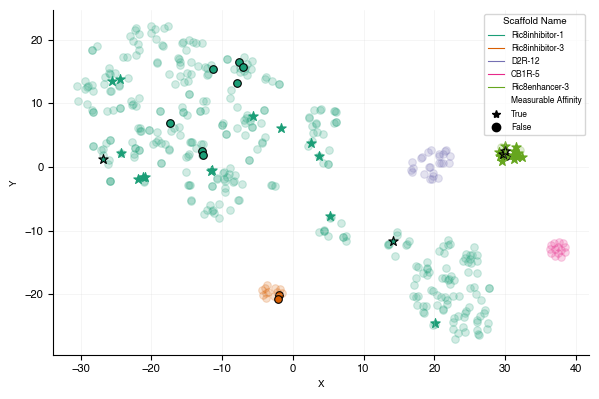

In [7]:
color_palette = {
    'Ric8inhibitor-1': '#1b9e77',
    'Ric8inhibitor-3': '#d95f02',
    'D2R-12': '#7570b3',
    'CB1R-5': '#e7298a',
    'Ric8enhancer-3': '#66a61e',
}

o_data = tsne_df[tsne_df['measurable_affinity'] == False]
star_data = tsne_df[tsne_df['measurable_affinity'] == True]

plt.rcParams.update({'font.size': 7, 'figure.autolayout': True})
plt.rcParams.update({'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.top': False, 'axes.spines.right': False})
plt.figure(figsize=(6, 4))

for hue_value, color in color_palette.items():
    subset = o_data[(o_data['Base Name'] == hue_value) & (o_data['Crystal Outcome'] == False)]
    plt.scatter(subset['X'], subset['Y'], facecolors=color, s=30, linewidth=0.8, label=hue_value, alpha=0.2)
    
    subset = o_data[(o_data['Base Name'] == hue_value) & (o_data['Crystal Outcome'] == True)]
    plt.scatter(subset['X'], subset['Y'], s=30, linewidth=0.8, edgecolors='black', facecolors=color)

for hue_value, color in color_palette.items():
    subset = star_data[(star_data['Base Name'] == hue_value) & (star_data['Crystal Outcome'] == False)]
    plt.scatter(subset['X'], subset['Y'], facecolors=color, s=50, linewidth=0.8, marker='*', alpha=1)
    
    subset = star_data[(star_data['Base Name'] == hue_value) & (star_data['Crystal Outcome'] == True)]
    plt.scatter(subset['X'], subset['Y'], facecolors=color, s=50, linewidth=0.8, marker='*', edgecolors='black')

from matplotlib.lines import Line2D

legend_handles = []
for hue_value, color in color_palette.items():
    legend_handles.append(Line2D([0], [0], color=color, label=hue_value,
                          markerfacecolor='none', markersize=6, linewidth=0.8))

legend_handles.append(Line2D([0], [0], color='black', label='Measurable Affinity', linestyle='None'))
legend_handles.append(Line2D([0], [0], marker='*', color='black', label="True", markersize=6, linestyle='None'))
legend_handles.append(Line2D([0], [0], marker='o', color='black', label="False", markersize=6, linestyle='None'))

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, color='lightgrey', alpha=0.3, linestyle='-', linewidth=0.5)
plt.legend(handles=legend_handles, title="Scaffold Name", loc='best', fontsize=6, title_fontsize=7)
plt.savefig('NCS1_tsne_scaffold_crystal_affinity.png', dpi=600, bbox_inches='tight')

In [8]:
tsne_coords = tsne_df[['CompoundCode', 'X', 'Y']]
df_final = pd.merge(df, tsne_coords, on='CompoundCode', how='left')
df_final.to_csv('NCS1_tsne_scaffold_crystal_affinity.csv', index=False)